# 12. 고윳값 분해: 선형대수학의 진주

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

import statsmodels.api as sm


# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False
plt.rc('font', family='NanumBarunGothic')

## 12-1. $A^{-1}$의 고유벡터는 $A$의 고유벡터와 같고 고윳값은 $A^{-1}$이다.
- $A$와 $A^{-1}$의 고윳값 분해를 풀어 이것이 사실임을 증명해라
- 무작위 최대계수 $5X5$ 대칭행렬을 사용해서 설명해라

In [2]:
# 무작위 5*5 행렬 생성
A = np.random.randn(5, 5)

# 대칭 행렬 만들기: A @ A^T
A = A @ A.T
A_inv = np.linalg.inv(A)

In [3]:
# 고유값, 고유벡터 구하기
evals_A, evecs_A = np.linalg.eig(A)
print(evals_A)
print("="*50)
print(evecs_A)

[9.16377441 3.95495288 2.24966332 0.51014835 0.06629833]
[[-0.19630663 -0.70502583 -0.16675595 -0.66074012 -0.00415007]
 [-0.1849038  -0.65132975  0.12634036  0.71863619 -0.09581375]
 [-0.49115094  0.06892495  0.52685607 -0.06490593  0.68718993]
 [ 0.2054791  -0.05450643  0.81753306 -0.20611301 -0.49392765]
 [ 0.80238606 -0.26643298  0.10145417  0.01700453  0.52403051]]


In [4]:
# A^-1의 고유값, 고유벡터 구하기
evals_A_inv, evecs_A_inv = np.linalg.eig(A_inv)
print(evals_A_inv)
print("="*50)
print(evecs_A_inv)

[15.08333564  1.96021411  0.44451096  0.25284751  0.10912534]
[[ 0.00415007  0.66074012  0.16675595  0.70502583 -0.19630663]
 [ 0.09581375 -0.71863619 -0.12634036  0.65132975 -0.1849038 ]
 [-0.68718993  0.06490593 -0.52685607 -0.06892495 -0.49115094]
 [ 0.49392765  0.20611301 -0.81753306  0.05450643  0.2054791 ]
 [-0.52403051 -0.01700453 -0.10145417  0.26643298  0.80238606]]


In [5]:
# Av = lambda * v
# AA^{-1} = 1
# A^-1의 고유값은 A의 고유값의 역수이다
print("A의 고유값          :", np.sort(evals_A))
print("A_inv의 고유값의 역수:", np.sort(1/evals_A_inv))

A의 고유값          : [0.06629833 0.51014835 2.24966332 3.95495288 9.16377441]
A_inv의 고유값의 역수: [0.06629833 0.51014835 2.24966332 3.95495288 9.16377441]


## 12-2. 그림 12-1의 왼쪽 그림 다시 생성하되 $V$의 열 대신 행을 사용한다

In [6]:
# 2*2 행렬 생성
matrix = np.array([[1,1],
                   [-1,5]])
random_matrix = np.random.randn(2, 2)

# eigenvalue, eigenvector 구하기
L, V = np.linalg.eig(matrix)
matrix_V = matrix @ V

(-1.5, 1.5)

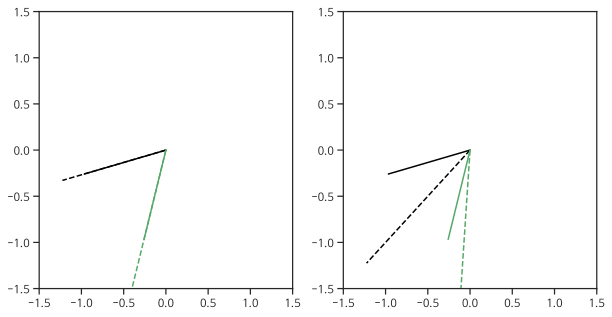

In [7]:
# V의 열 사용
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([0, V[0,0]], [0,V[1,0]], color='black')
plt.plot([0, matrix_V[0,0]], [0,matrix_V[1,0]], color='black', linestyle='--')
plt.plot([0, V[0,1]], [0, V[1,1]], color='g')
plt.plot([0, matrix_V[0,1]], [0,matrix_V[1,1]], color='g', linestyle='--')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)



# V의 행 사용
plt.subplot(1,2,2)
plt.plot([0, V[0,0]], [0,V[0,1]], color='black')
plt.plot([0, matrix_V[0,0]], [0,matrix_V[0,1]], color='black', linestyle='--')
plt.plot([0, V[1,0]], [0, V[1,1]], color='g')
plt.plot([0, matrix_V[1,0]], [0,matrix_V[1,1]], color='g', linestyle='--')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

## 12-10. 일반화된 고윳값 분해에서는 두 행렬이 대칭인 경우에도 고유 벡터 직교하지 않는다.
- 파이썬에서 $V^{-1} \neq V^{T}$ 확인, 이는 $A, B$ 모두 대칭이지만 $C=AB$가 대칭이 아니라서 그렇다
- 그러나 고유벡터는 $B$에 대해 직교하므로 $V^{T}BV = I$가 된다
- 두 대칭행렬에 대해 일반화된 고윳값 분해 수행하여 그림 그리고 특성을 확인하자

In [8]:
# 상관된 행렬 생성
A = np.random.randn(5, 5)
A = A @ A.T

B = np.random.randn(5, 5)
B = B @ B.T

L, V = scipy.linalg.eigh(A, B)

In [9]:
# V.T 확인
print(V.T)

[[-9.33327894e-02  8.50197172e-02 -5.24385426e-02  3.86103861e-01
   9.58618467e-03]
 [-1.08874499e-01 -3.40665737e-01 -1.04404723e-01 -3.63239483e-02
   2.08947547e-01]
 [ 5.04588546e-01 -2.74788859e-01  5.58515136e-01  4.29238010e-01
  -2.26856147e-01]
 [ 1.25278299e+00 -5.14628934e-01 -1.43397227e+00  8.19306930e-02
   4.28425357e-01]
 [-9.22640865e+00  4.21415666e+00 -2.12174354e+00 -3.51372424e+00
  -9.74795754e+00]]


In [10]:
# inv(V) 확인
print(np.linalg.inv(V))

[[-8.16861562e-01  4.01228001e-01 -6.44607455e-01  2.20940676e+00
   2.90520535e-01]
 [-1.25700947e+00 -2.43822036e+00 -1.81230634e-01  2.05918255e-01
   1.00905796e-01]
 [ 3.80160625e-01 -8.49158200e-01  3.77292230e-01  3.53371183e-01
  -9.36418646e-01]
 [ 3.03847028e-01 -1.13030669e-01 -4.63806324e-01  4.15654849e-02
  -2.50485024e-01]
 [-2.32403180e-02 -3.70746756e-02 -3.36834125e-02  1.89699027e-04
  -8.93533649e-02]]


In [11]:
# VtBV = I인지 확인
VtBV = V.T @ B @ V
np.allclose(VtBV, np.eye(5))

True

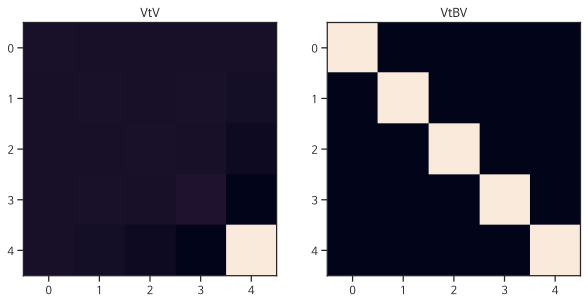

In [12]:
VtV = V.T @ V


transposed_dict = {"VtV": VtV, "VtBV": VtBV}

figs, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

for i, key in enumerate(transposed_dict.keys()):
    # print(i, transposed)
    axes[i].imshow(transposed_dict[key])
    axes[i].set_title(f"{key}")